In [82]:
import os.path 
import matplotlib.pyplot as plt                                #Bibliothèque pour gérer documents textes et graphiques
import numpy as np
from tkinter.messagebox import *
from tkinter import *

class CompteBancaire():
    "création d'une simulation de banque et de ses fonctions"
    

    def __init__(self, name, iden, mdp):
        self.name = name
        self.iden = iden
        self.mdp = mdp
                #Création du repertoire et des données de l'utilisateur
        writer = open("repertoire.txt", "a")  
        f = open("repertoire.txt", 'r')
        if f.mode == 'r':
            self.contenu = f.readlines()
        f.close()
        for i in range(len(self.contenu)):
            self.ligne = self.contenu[i]
            self.coupe = self.ligne.split(" ")
            pseudo = self.coupe[0]
            if pseudo == self.iden:
                print('Identifiant déjà utilisé, veuillez le changer')
                return None
        writer.write(self.iden + " ")
        writer.write(self.mdp + " ")
        writer.write(self.name+" ")
        writer.write("None")
        writer.write(" ")
        writer.write("None")
        writer.write("\n")

        writer.close()  #on ferme le fichier
            
        
    def affiche(self):
        fds=open("repertoire.txt", "r")             #affiche le document texte repertoire contenant les données
        if fds.mode == 'r':
            contents = fds.readlines()
        fds.close()
        print(contents)
            
    def identité(self):
        #méthode pour se connecter et avoir accés à uniquement ses données et pas celle des autres
        self.condition_de_boucle = False   
        #on stocke dans une variable le contenu des lignes 
        f = open("repertoire.txt", 'r')
        if f.mode == 'r':
            self.contenu = f.readlines()
        f.close()
        while self.condition_de_boucle != True:
            #boucle permettant de ne pas executer la fonction de nouveau si on se trompe
            self.verif = input('Veuillez entrer votre identifiant : ')
            self.verif2 = input('Veuillez entrer votre mot de passe : ')
            for i in range(len(self.contenu)):
                #On utilise les données du docuement et on les transforme de manière à les exploiter
                self.ligne = self.contenu[i]
                self.coupe = self.ligne.split(" ")
                self.pseudo = self.coupe[0]
                self.motdepasse=self.coupe[1]
#on vérifie si les mots de passe et utlisateurs sont bons, pas besoin de rentrer de nouveaux ses codes grace aux self.verif
                if self.pseudo == self.verif and self.motdepasse == self.verif2:
                    self.pseudo = self.verif
                    self.motdepasse = self.verif2
                    print("Vous êtes bien connecté")
                    self.condition_de_boucle = True
                    break
                    


    def creer_compte_courant(self):
        #méthode pour créer un compte courant
        self.condition_de_boucle = False
        #on stocke dans une variable le contenu des lignes 
        f = open("repertoire.txt", 'r')
        if f.mode == 'r':
            self.contenu = f.readlines()
        f.close()
        for i in range(len(self.contenu)):
            #On utilise les données du docuement et on les transforme de manière à les exploiter
            self.ligne = self.contenu[i]
            self.coupe = self.ligne.split(" ")
            pseudo = self.coupe[0]
            motdepasse=self.coupe[1]
            nom = self.coupe[2]
#on vérifie si les mots de passe et utlisateurs sont bons, pas besoin de rentrer de nouveaux ses codes grace aux self.verif
            if pseudo == self.verif and motdepasse == self.verif2:
                #Pour modifier la lignes du documents on l'efface et on l'écris de nouveau avec les modification
                self.contenu[i]=""
                self.banque = '0'
                self.contenu.append(pseudo + " " + motdepasse + " " + nom + " " + self.banque + " " + 'None'+ '\n')
                print('Compte courant crée')
#la commande "write" permet d'effacer tout le document et de réecrire, ici avec les modification dans self.contenu
                writer = open('repertoire.txt','w+')
                for z in range(len(self.contenu)):
                    writer.write(self.contenu[z])
                writer.close()
    
    def creer_compte_épargne(self):
        #même méthode que la précedente mais pour le compte épargne
        self.condition_de_boucle = False
        f = open("repertoire.txt", 'r')
        if f.mode == 'r':
            self.contenu = f.readlines()
        f.close()
#seule différence on exige la création d'un compte courant avant un compte épargne, condition d'utilisation de la banque
        if self.banque == '0':
            for i in range(len(self.contenu)):
                #On utilise les données du docuement et on les transforme de manière à les exploiter
                self.ligne = self.contenu[i]
                self.coupe = self.ligne.split(" ")
                pseudo = self.coupe[0]
                motdepasse=self.coupe[1]
                nom = self.coupe[2]
#on vérifie si les mots de passe et utlisateurs sont bons, pas besoin de rentrer de nouveaux ses codes grace aux self.verif
                if pseudo == self.verif and motdepasse == self.verif2:
                    self.contenu[i]=""
                    self.contenu.append(pseudo + " " + motdepasse + " " + nom + " " + '0' + " " + '0' + '\n')
                    print('Compte épargne crée')
#la commande "write" permet d'effacer tout le document et de réecrire, ici avec les modification dans self.contenu
                    writer = open('repertoire.txt','w+')
                    for z in range(len(self.contenu)):
                        writer.write(self.contenu[z])
                    writer.close()
        else:
            print("Veuillez crée un compte courant avant un compte épargne")
                

    
    def depot(self):
        #méthodes pour ajouter de l'argent sur un des 2 comptes
        #on stocke dans une variable le contenu des lignes 
        f = open("repertoire.txt", 'r')
        if f.mode == 'r':
            self.contenu = f.readlines()
        f.close()
        #on saisi le montant d'argent à déposer
        condition_de_boucle2 = False
        depot = int(input("Veuiller saisir le montant à déposer : "))
        for i in range(len(self.contenu)):
#on relit le fichier et on stock les nouvelles informations dans la variable (afin d'éxécuter la fonction 
#plusieurs fois sans erreur)
            f = open("repertoire.txt", 'r')
            if f.mode == 'r':
                self.contenu = f.readlines()
            f.close()
            #On utilise les données du docuement et on les transforme de manière à les exploiter
            self.ligne = self.contenu[i]
            self.coupe = self.ligne.split(" ")
            pseudo = self.coupe[0]
            motdepasse=self.coupe[1]
            nom = self.coupe[2]
#on vérifie si les mots de passe et utlisateurs sont bons, pas besoin de rentrer de nouveaux ses codes grace aux self.verif
            if pseudo == self.verif and motdepasse == self.verif2:
                while condition_de_boucle2 != True:
                #on ouvre le document historique courant pour stocker les modifications pour la création de graphique
                    fw = open("historique_courant_"+ pseudo+"_.txt", "a")
                #on choisi le compte sur lequel on dépose l'argent
                    choix = input("Choisissez votre compte : ")
#création d'une variable qui transforme la réposne en str ce qui correspond à la vérification de la condition
                    condition = str(choix)
                    if condition == "compte courant" or condition == "Compte courant" or condition == '1':
                        #on effectue les opérations pour ajouter l'argent et on modifie les données de self.contenu
                        result = int(self.coupe[3])+depot
                        self.coupe[3] = str(result)
                        self.contenu[i]=""
                        self.contenu.append(pseudo + " " + motdepasse + " " + nom + " " + self.coupe[3] + " " + self.coupe[4])
    #on écrit dans le fichier historique la valeur du compte après la modification, un espace et of ferme le fichier
                        fw.write(self.coupe[3])
                        fw.write(' ')
                        fw.close()
    #la commande "write" permet d'effacer tout le document et de réecrire, ici avec les modification dans self.contenu
                        file = open('repertoire.txt','w+')
                        for z in range(len(self.contenu)):
                            file.write(self.contenu[z])
                        file.close()
                        condition_de_boucle2 = True
                    #on effectue les mêmes opérations pour le compte épargne et avec le fichier historique épargne
                    elif condition == "compte epargne" or condition == "Compte epargne" or condition == '2':
                        result2 = int(self.coupe[4])+depot
                        self.coupe[4] = str(result2)
                    
                        self.contenu[i]=""
                        self.contenu.append(pseudo + " " + motdepasse + " " + nom + " " + self.coupe[3] + " " + self.coupe[4])
                        file = open('repertoire.txt','w+')
                        for z in range(len(self.contenu)):
                            file.write(self.contenu[z])
                        file.close()
                        condition_de_boucle2 = True
                    else:
                        print('Veuillez choisir un compte valide')
                        
    def simulation(self):
        f = open("repertoire.txt", 'r')
        if f.mode == 'r':
                self.contenu = f.readlines()
        f.close()
        for i in range(len(self.contenu)):
            #On utilise les données du docuement et on les transforme de manière à les exploiter
            self.ligne = self.contenu[i]
            self.coupe = self.ligne.split(" ")
        #méthode qui permet de visualiser son compte épargne après un nombre d'années choisis par l'utilisateur
        self.nombre_année = int(input("Choisissez un nombre d'année pour simuler l'argent de votre compte épargne"))
        simulation =0
        for j in range(1,self.nombre_année+1):
            simulation += int(self.coupe[4]) + (int(self.coupe[4])*0.25)
        return simulation, self.nombre_année
                    
                    
    
    def retrait(self):
        #même méthode que pour le dépot mais cette fois on retire de l'argent
        f = open("repertoire.txt", 'r')
        if f.mode == 'r':
            self.contenu = f.readlines()
        f.close()
        condition_de_boucle3 = False
        depot = int(input("Veuiller saisir le montant à retirer : "))
        for i in range(len(self.contenu)):
            f = open("repertoire.txt", 'r')
            if f.mode == 'r':
                self.contenu = f.readlines()
            f.close()
            self.ligne = self.contenu[i]
            self.coupe = self.ligne.split(" ")
            pseudo = self.coupe[0]
            motdepasse=self.coupe[1]
            nom = self.coupe[2]
            if pseudo == self.verif and motdepasse == self.verif2:
                while condition_de_boucle3 != True:
                    fw = open("historique_courant_"+ pseudo+"_.txt", "a")
                    choix = input("Choisissez votre compte : ")
                    condition = str(choix)
                    if condition == "compte courant" or condition == "Compte courant" or condition == '1':   
                        result = int(self.coupe[3])-depot
                        condition_de_boucle3 = True
                        if result < 0 :
                            return "vous n'avez pas assez d'argent sur votre compte"
                        else:
                            self.coupe[3] = str(result)
                            self.contenu[i]=""
                            self.contenu.append(pseudo + " " + motdepasse + " " + nom + " " + self.coupe[3] + " " + self.coupe[4])
                            fw.write(self.coupe[3])
                            fw.write(' ')
                            fw.close()
                            file = open('repertoire.txt','w+')
                            for z in range(len(self.contenu)):
                                file.write(self.contenu[z])
                            file.close()        
                    elif condition == "compte epargne" or condition == "Compte epargne" or condition == '2':
                        result2 = int(self.coupe[4])-depot
                        condition_de_boucle3 = True
                        if result2 < 0 :
                            return "vous n'avez pas assez d'argent sur votre compte" 
                        else:
                            self.coupe[4] = str(result2)
                        
                            self.contenu[i]=""
                            self.contenu.append(pseudo + " " + motdepasse + " " + nom + " " + self.coupe[3] + " " + self.coupe[4])
                            file = open('repertoire.txt','w+')
                            for z in range(len(self.contenu)):
                                file.write(self.contenu[z])
                            file.close()
                    else:
                        print (" veulliez choisir un compte valable")
                    
    def afficher_compte(self):
        #méthode qui permet de visualiser son comtpte courant et son compte épargne
        f = open("repertoire.txt", 'r')
        if f.mode == 'r':
            self.contenu = f.readlines()
        f.close()
        for i in range(len(self.contenu)):
            self.ligne = self.contenu[i]
            self.coupe = self.ligne.split(" ")
            pseudo = self.coupe[0]
            motdepasse=self.coupe[1]
            nom = self.coupe[2]         
            if pseudo == self.verif and motdepasse == self.verif2:
                return self.coupe[3], self.coupe[4]
    
    def creer_historique(self):
        #fonction qui permet de créer les fichiers contenant les variations des comptes (pour les graphiques)
        f = open("repertoire.txt", 'r')
        if f.mode == 'r':
            self.contenu = f.readlines()
        f.close()
        for i in range(len(self.contenu)):
            #On utilise les données du docuement et on les transforme de manière à les exploiter
            self.ligne = self.contenu[i]
            self.coupe = self.ligne.split(" ")
            pseudo = self.coupe[0]
            motdepasse=self.coupe[1]
        #on vérifie si les mots de passe et utlisateurs sont bons, pas besoin de rentrer de nouveaux ses codes grace aux self.verif
            if pseudo == self.verif and motdepasse == self.verif2:
                writer = open("historique_courant_"+ pseudo+"_.txt", "a")
    
    def graphique_courant(self):
        #méthodes qui crée un graphiques du compte courant 
        liste = []
        indice = []
        f = open("repertoire.txt", 'r')
        if f.mode == 'r':
            self.contenu = f.readlines()
        f.close()
        for i in range(len(self.contenu)):
            #On utilise les données du docuement et on les transforme de manière à les exploiter
            self.ligne = self.contenu[i]
            self.coupe = self.ligne.split(" ")
            pseudo = self.coupe[0]
            motdepasse=self.coupe[1]
            #on vérifie si les mots de passe et utlisateurs sont bons, pas besoin de rentrer de nouveaux ses codes grace aux self.verif
            if pseudo == self.verif and motdepasse == self.verif2:
                bowl = open("historique_courant_"+ pseudo+"_.txt",'r')
                if bowl.mode == 'r':
                    hist = bowl.readlines()
                bowl.close()
                for i in range(len(hist)):
                    ligne = hist[i]
                    coupe = ligne.split(' ')
                for i in range(len(coupe)):
                    liste.append(coupe[i])
                    indice.append(i)
                del liste[-1]
                del indice[-1]
                ints = [int(item) for item in liste]
                x = np.array(indice)
                y = np.array(ints)
                plt.plot(x,y)
                plt.show()
        
        

#commande hors code de la classe pour supprimer les fichiers automatiquement et faciliter les tests
        
def effacer_compte():
    #fonction qui permet de supprimer le répertoire, et de repartir à zéro
    os.remove('repertoire.txt')



def effacer_historique():
    #fonction qui permet de supprimer les historiques, et de repartir à zéro
    os.remove('historique_courant.txt')

In [83]:
effacer_compte()

In [84]:
user = CompteBancaire("ke", "k","1")

In [85]:
user = CompteBancaire("je", "j","2")

In [86]:
user = CompteBancaire('je','j','1')

Identifiant déjà utilisé, veuillez le changer


In [87]:
user = CompteBancaire("le", "l",'3')

In [88]:
user.affiche()

['k 1 ke None None\n', 'j 2 je None None\n', 'l 3 le None None\n']


In [100]:
user.identité()

Veuillez entrer votre identifiant : k
Veuillez entrer votre mot de passe : 1
Vous êtes bien connecté


In [102]:
user.creer_compte_courant()

Compte courant crée


In [103]:

user.creer_compte_épargne()

Compte épargne crée


In [112]:
user.depot()

Veuiller saisir le montant à déposer : 170
Choisissez votre compte : 2


In [105]:
user.retrait()

Veuiller saisir le montant à retirer : 60
Choisissez votre compte : 1


In [106]:
user.creer_historique()

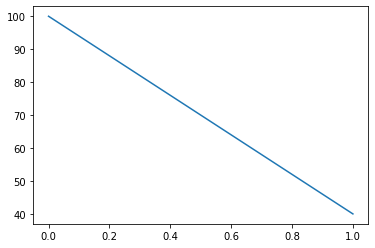

In [107]:
user.graphique_courant()

In [108]:
user.afficher_compte()

('40', '0\n')

In [113]:
user.simulation()

Choisissez un nombre d'année pour simuler l'argent de votre compte épargne15


(3750.0, 15)